<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Install the required libraries


In [1]:
# !pip install pandas
# !pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [3]:
df.shape # (rows, cols)

(65437, 114)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [5]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [6]:
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


In [7]:
summary = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Unique Values': df.nunique().values,
    'Non-Null Values': df.notnull().sum().values,
    'Duplicate Values': [df.duplicated(subset=[col]).sum() for col in df.columns],
    'Missing Values': df.isnull().sum().values,
    '% Missing': (df.isnull().mean() * 100).round(2).values,
    'Is Constant' : (df.nunique() == 1).values,
    'Values' : [df[col].dropna().unique().tolist() for col in df.columns]
})
summary = summary.sort_values('Unique Values', ascending=False).reset_index(drop=True)
pd.DataFrame(summary)

,Column,Data Type,Unique Values,Non-Null Values,Duplicate Values,Missing Values,% Missing,Is Constant,Values
0,ResponseId,int64,65437,65437,0,0,0.00,False,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,LanguageHaveWorkedWith,object,23864,59745,41572,5692,8.70,False,[Bash/Shell (all shells);Go;HTML/CSS;Java;Java...
2,LanguageWantToWorkWith,object,22769,55752,42667,9685,14.80,False,[Bash/Shell (all shells);Go;HTML/CSS;Java;Java...
3,ToolsTechHaveWorkedWith,object,19883,52482,45553,12955,19.80,False,"[Docker;Homebrew;Kubernetes;npm;Vite;Webpack, ..."
4,ToolsTechWantToWorkWith,object,16549,46084,48887,19353,29.58,False,"[Docker;Homebrew;Kubernetes;npm;Vite;Webpack, ..."
...,...,...,...,...,...,...,...,...,...
109,AISelect,object,3,60907,65433,4530,6.92,False,"[Yes, No, and I don't plan to, No, but I plan ..."
110,SurveyLength,object,3,56182,65433,9255,14.14,False,"[Appropriate in length, Too long, Too short]"
111,ICorPM,object,2,29801,65434,35636,54.46,False,"[Individual contributor, People manager]"
112,TBranch,object,2,44477,65434,20960,32.03,False,"[No, Yes]"


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [8]:
# Manually scan values
print(df['Country'].unique())
print(df['EdLevel'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [9]:
# Check for weird values (too short/long or non-letter)
weird_countries = df['Country'].dropna().unique()
weird_countries = [c for c in weird_countries if
                   len(str(c)) < 3
                   or len(str(c)) > 20
                   or not str(c).replace(' ', '').isalpha()] # remove space, look for non-letter
print(weird_countries)

['United States of America', 'United Kingdom of Great Britain and Northern Ireland', 'Iran, Islamic Republic of...', 'Republic of North Macedonia', 'United Republic of Tanzania', 'Venezuela, Bolivarian Republic of...', 'Bosnia and Herzegovina', 'Hong Kong (S.A.R.)', "Lao People's Democratic Republic", 'Democratic Republic of the Congo', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Congo, Republic of the...', 'Guinea-Bissau', 'Central African Republic', 'Libyan Arab Jamahiriya', 'Saint Kitts and Nevis', 'Micronesia, Federated States of...']


In [10]:
# Check for weird values (too short/long or non-letter)
weird_edlevel = df['EdLevel'].dropna().unique()
weird_edlevel = [c for c in weird_edlevel if
                   len(str(c)) < 3
                   or len(str(c)) > 10
                   or not str(c).replace(' ', '').isalpha()] # remove space, look for non-letter
print(weird_edlevel)

['Primary/elementary school', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Some college/university study without earning a degree', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'Associate degree (A.A., A.S., etc.)', 'Something else']


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [11]:
# Country mapping
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Republic of North Macedonia': 'North Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Bosnia and Herzegovina': 'Bosnia',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    "Lao People's Democratic Republic": 'Laos',
    'Democratic Republic of the Congo': 'DR Congo',
    "Côte d'Ivoire": "Ivory Coast",
    "Democratic People's Republic of Korea": 'North Korea',
    'Congo, Republic of the...': 'Republic of Congo',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Central African Republic': 'CAR',
    'Libyan Arab Jamahiriya': 'Libya',
    'Saint Kitts and Nevis': 'St. Kitts & Nevis',
    'Micronesia, Federated States of...': 'Micronesia'
}

df['Country'] = df['Country'].replace(country_mapping)

In [12]:
# Education Level mapping
edlevel_mapping = {
    'Primary/elementary school': 'Primary School',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'High School',
    'Some college/university study without earning a degree': 'Some College',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Doctorate or Professional Degree',
    'Something else': 'Other'
}

df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

In [13]:
# Verify
print(df['Country'].unique())
print(df['EdLevel'].unique())

['USA' 'UK' 'Canada' 'Norway' 'Uzbekistan' 'Serbia' 'Poland' 'Philippines'
 'Bulgaria' 'Switzerland' 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine'
 'Australia' 'Brazil' 'Japan' 'Austria' 'Iran' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'North Macedonia' 'Finland' 'Slovakia'
 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico' 'Tanzania'
 'Hungary' 'Argentina' 'Portugal' 'Sri Lanka' 'Latvia' 'China' 'Singapore'
 'Lebanon' 'Spain' 'South Africa' 'Lithuania' 'Viet Nam'
 'Dominican Republic' 'Indonesia' 'Kosovo' 'Morocco' 'Taiwan' 'Georgia'
 'San Marino' 'Tunisia' 'Bangladesh' 'Nigeria' 'Liechtenstein' 'Denmark'
 'Ecuador' 'Malaysia' 'Albania' 'Azerbaijan' 'Chile' 'Ghana' 'Peru'
 'Bolivia' 'Egypt' 'Luxembourg' 'Montenegro' 'Cyprus' 'Paraguay'
 'Kazakhstan' 'Slovenia' 'Jordan' 'Venezuela' 'Costa Rica' 'Jamaica'
 'Thailand' 'Nicaragua' 'Myanmar' 'Republic of Korea' 'Rwanda' 'Bosnia'
 'Benin' 'El Salvador'

### 4. Encoding Categorical Variables (One-Hot Encoding)


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [14]:
print(df['Employment'].unique())

['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, full-time;Not employed, but looking for work;Independent contr

In [15]:
# Employment has too many unique values, let me find other fields!
summary[['Column', 'Unique Values']].sort_values(by='Unique Values').head()

,Column,Unique Values
113,Check,1
111,ICorPM,2
112,TBranch,2
105,RemoteWork,3
109,AISelect,3


In [16]:
print(df['ICorPM'].unique())

[nan 'Individual contributor' 'People manager']


In [17]:
# One-hot encoding on ICorPM
df_1hot = pd.get_dummies(df, columns=['ICorPM'])
df_1hot = df_1hot.filter(like='ICorPM')
df_1hot.head()

,ICorPM_Individual contributor,ICorPM_People manager
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [18]:
summary[['Column', 'Missing Values']].sort_values(by='Missing Values', ascending=False).head()

,Column,Missing Values
49,AINextMuch less integrated,64289
50,AINextLess integrated,63082
45,AINextNo change,52939
44,AINextMuch more integrated,51999
41,EmbeddedAdmired,48704


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [19]:
print('Nulls before imputation:', df['ConvertedCompYearly'].isnull().sum())

mean_ConvertedCompYearly = df['ConvertedCompYearly'].mean()
df.fillna({'ConvertedCompYearly' : mean_ConvertedCompYearly}, inplace=True)

print('Nulls before imputation:', df['ConvertedCompYearly'].isnull().sum())

Nulls before imputation: 42002
Nulls before imputation: 0


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [20]:
print('Nulls before imputation:', df['RemoteWork'].isnull().sum())

mode_RemoteWork = df['RemoteWork'].mode()[0]
df.fillna({'RemoteWork' : mode_RemoteWork}, inplace=True)

print('Nulls before imputation:', df['RemoteWork'].isnull().sum())

Nulls before imputation: 10631
Nulls before imputation: 0


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [21]:
x = df['ConvertedCompYearly']
df['ConvertedCompYearly_MinMax'] = (x - x.min()) / (x.max() - x.min())
df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].describe()

,ConvertedCompYearly,ConvertedCompYearly_MinMax
count,6.543700e+04,65437.000000
mean,8.615529e+04,0.005300
std,1.117614e+05,0.006875
min,1.000000e+00,0.000000
25%,8.615529e+04,0.005300
50%,8.615529e+04,0.005300
75%,8.615529e+04,0.005300
max,1.625660e+07,1.000000


Text(0, 0.5, 'Frequency')

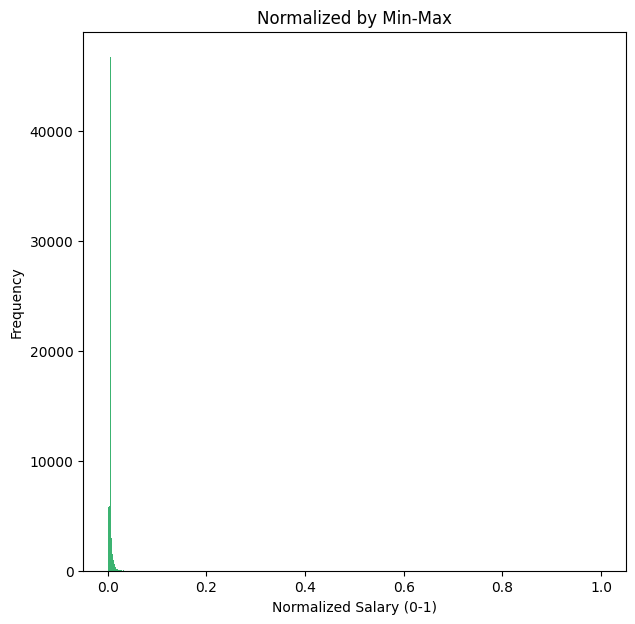

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.hist(df['ConvertedCompYearly_MinMax'].dropna(), bins=500, color='mediumseagreen')
plt.title('Normalized by Min-Max')
plt.xlabel('Normalized Salary (0-1)')
plt.ylabel('Frequency')

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [23]:
import numpy as np

df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly']) # add 1 to avoid log(0) errors
df[['ConvertedCompYearly', 'ConvertedCompYearly_Log']].describe()

,ConvertedCompYearly,ConvertedCompYearly_Log
count,6.543700e+04,65437.000000
mean,8.615529e+04,11.156906
std,1.117614e+05,0.884085
min,1.000000e+00,0.693147
25%,8.615529e+04,11.363918
50%,8.615529e+04,11.363918
75%,8.615529e+04,11.363918
max,1.625660e+07,16.604010


Text(0, 0.5, 'Frequency')

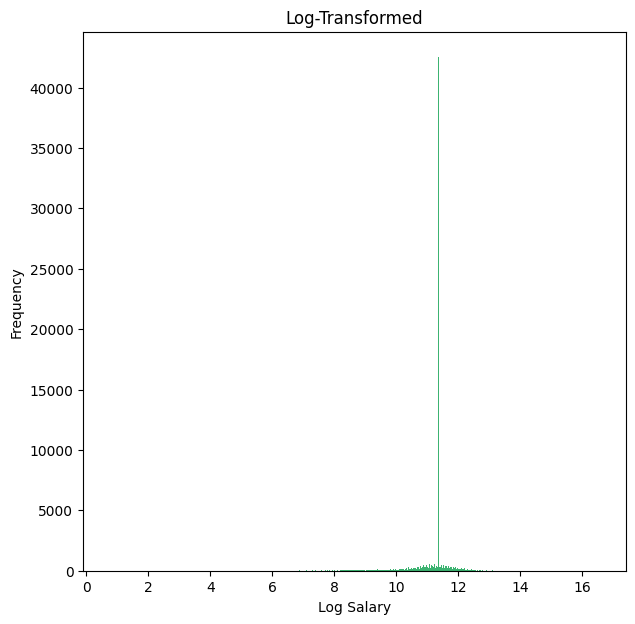

In [24]:
plt.figure(figsize=(7, 7))
plt.hist(df['ConvertedCompYearly_Log'].dropna(), bins=500, color='mediumseagreen')
plt.title('Log-Transformed')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [25]:
df['YearsCodePro'].describe()

count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro, dtype: object

In [26]:
# Why is it a categorical column?
df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [27]:
# Replace strings with approximate numeric values
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'  # or cap it to 50
})

# Convert to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Verify
df['YearsCodePro'].describe()

count    51610.000000
mean        10.184344
std          9.109703
min          0.000000
25%          3.000000
50%          7.000000
75%         15.000000
max         51.000000
Name: YearsCodePro, dtype: float64

In [28]:
# Define a function that takes and categorize 'years'
def categorize_experience(years):
    if pd.isna(years):
        return 'Unknown'
    elif years == 0:
        return 'No experience'
    elif years <= 3:
        return 'Beginner'
    elif years <= 6:
        return 'Intermediate'
    elif years <= 10:
        return 'Experienced'
    else:
        return 'Expert'

# Create 'ExperienceLevel' column
df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)

# Verify
dist_ExperienceLevel = df['ExperienceLevel'].value_counts(dropna=False).sort_values()
dist_ExperienceLevel

ExperienceLevel
No experience     2856
Intermediate      9584
Experienced       9810
Beginner         10900
Unknown          13827
Expert           18460
Name: count, dtype: int64

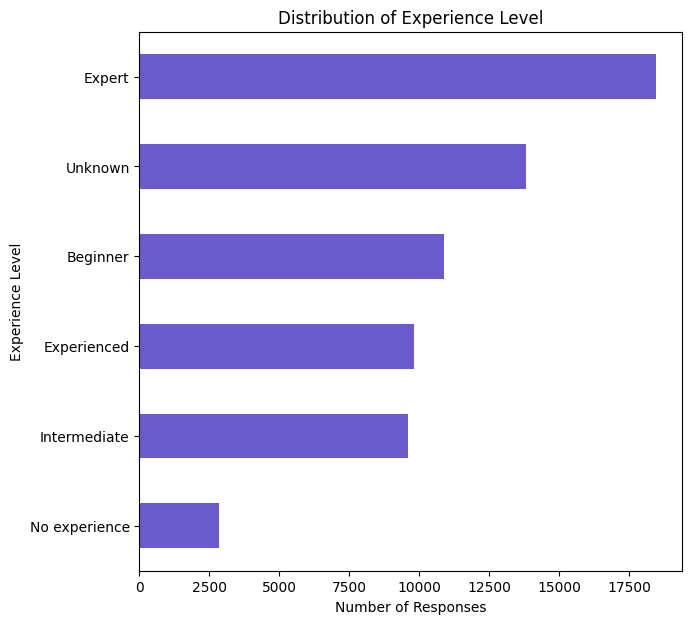

In [29]:
plt.figure(figsize=(7, 7))
dist_ExperienceLevel.plot(kind='barh', color='slateblue')
plt.title('Distribution of Experience Level')
plt.xlabel('Number of Responses')
plt.ylabel('Experience Level')
plt.show()

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
